<a href="https://colab.research.google.com/github/pydataktm/DataScience/blob/master/MentorSession/eda/fifa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA
Exploratory Data Analysis (EDA) is an approach/philosophy for data analysis that employs a variety of techniques (mostly graphical) to

#### 1) maximize insight into a data set;
#### 2) uncover underlying structure;
#### 3) extract important variables;
#### 4) detect outliers and anomalies;
#### 5) test underlying assumptions;
#### 6) develop parsimonious models; and
#### 7) determine optimal factor settings.
[reference](https://www.itl.nist.gov/div898/handbook/eda/section1/eda11.html)
![](https://blog.camelot-group.com/wp-content/uploads/2019/03/Picture2.png)

## Basic libraries importing

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Loading the dataset

In [0]:
data=pd.read_csv('/content/data.csv')

In [0]:
data.head(2)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M


## Understanding data 
How big is the data ? No of rows / no of columns 

In [0]:
data.shape

(18207, 89)

what type of data ?

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

Simple statistical analysis over the data.

In [0]:
data.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000

Column operations

Is there any empty / null values ?

In [0]:
data.isna().sum().sum()

76984

Since it has overwhelming 89 column ? how could we narrowed down our view on the data ? 

In [0]:
sliced = data[['Name','Age','Nationality','Club','Value','Finishing','SprintSpeed','Preferred Foot']]
sliced

,Name,Age,Nationality,Club,Value,Finishing,SprintSpeed,Preferred Foot
0,L. Messi,31,Argentina,FC Barcelona,€110.5M,95.0,86.0,Left
1,Cristiano Ronaldo,33,Portugal,Juventus,€77M,94.0,91.0,Right
2,Neymar Jr,26,Brazil,Paris Saint-Germain,€118.5M,87.0,90.0,Right
3,De Gea,27,Spain,Manchester United,€72M,13.0,58.0,Right
4,K. De Bruyne,27,Belgium,Manchester City,€102M,82.0,76.0,Right
...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,Crewe Alexandra,€60K,38.0,57.0,Right
18203,N. Christoffersson,19,Sweden,Trelleborgs FF,€60K,52.0,39.0,Right
18204,B. Worman,16,England,Cambridge United,€60K,40.0,69.0,Right
18205,D. Walker-Rice,17,England,Tranmere Rovers,€60K,50.0,60.0,Right


In [0]:
mapper={'Left':'Left-foot','Right':'Right-foot'}
sliced['Preferred Foot']=sliced['Preferred Foot'].map(mapper)
sliced

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Age,Nationality,Club,Value,Finishing,SprintSpeed,Preferred Foot
0,L. Messi,31,Argentina,FC Barcelona,€110.5M,95.0,86.0,Left-foot
1,Cristiano Ronaldo,33,Portugal,Juventus,€77M,94.0,91.0,Right-foot
2,Neymar Jr,26,Brazil,Paris Saint-Germain,€118.5M,87.0,90.0,Right-foot
3,De Gea,27,Spain,Manchester United,€72M,13.0,58.0,Right-foot
4,K. De Bruyne,27,Belgium,Manchester City,€102M,82.0,76.0,Right-foot
...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,Crewe Alexandra,€60K,38.0,57.0,Right-foot
18203,N. Christoffersson,19,Sweden,Trelleborgs FF,€60K,52.0,39.0,Right-foot
18204,B. Worman,16,England,Cambridge United,€60K,40.0,69.0,Right-foot
18205,D. Walker-Rice,17,England,Tranmere Rovers,€60K,50.0,60.0,Right-foot


How many of the players are German ?

In [0]:
data['Club'].value_counts()

Cardiff City           33
Eintracht Frankfurt    33
TSG 1899 Hoffenheim    33
Fortuna Düsseldorf     33
Liverpool              33
                       ..
Cruzeiro               20
Grêmio                 20
Sligo Rovers           19
Limerick FC            19
Derry City             18
Name: Club, Length: 651, dtype: int64

okay, list of the countries, where players belong

In [0]:
data.Nationality.unique()

array(['Argentina', 'Portugal', 'Brazil', 'Spain', 'Belgium', 'Croatia',
       'Uruguay', 'Slovenia', 'Poland', 'Germany', 'France', 'England',
       'Italy', 'Egypt', 'Colombia', 'Denmark', 'Gabon', 'Wales',
       'Senegal', 'Costa Rica', 'Slovakia', 'Netherlands',
       'Bosnia Herzegovina', 'Morocco', 'Serbia', 'Algeria', 'Austria',
       'Greece', 'Chile', 'Sweden', 'Korea Republic', 'Finland', 'Guinea',
       'Montenegro', 'Armenia', 'Switzerland', 'Norway', 'Czech Republic',
       'Scotland', 'Ghana', 'Central African Rep.', 'DR Congo',
       'Ivory Coast', 'Russia', 'Ukraine', 'Iceland', 'Mexico', 'Jamaica',
       'Albania', 'Venezuela', 'Japan', 'Turkey', 'Ecuador', 'Paraguay',
       'Mali', 'Nigeria', 'Cameroon', 'Dominican Republic', 'Israel',
       'Kenya', 'Hungary', 'Republic of Ireland', 'Romania',
       'United States', 'Cape Verde', 'Australia', 'Peru', 'Togo',
       'Syria', 'Zimbabwe', 'Angola', 'Burkina Faso', 'Iran', 'Estonia',
       'Tunisia', 'Equato

let's see the top sprinted player

In [0]:
sliced[sliced.SprintSpeed == max(sliced.SprintSpeed)]

,Name,Age,Nationality,Club,Value,Finishing,SprintSpeed,Preferred Foot
25,K. Mbappé,19,France,Paris Saint-Germain,€81M,88.0,96.0,Right-foot
55,L. Sané,22,Germany,Manchester City,€61M,81.0,96.0,Left-foot
1968,Adama,22,Spain,Wolverhampton Wanderers,€10.5M,61.0,96.0,Right-foot


let's see the old player

In [0]:
old_players = sliced['Age']>42     
sliced[old_players]



,Name,Age,Nationality,Club,Value,Finishing,SprintSpeed,Preferred Foot
4741,O. Pérez,45,Mexico,Pachuca,€160K,14.0,57.0,Right-foot
17726,T. Warner,44,Trinidad & Tobago,Accrington Stanley,€0,13.0,21.0,Right-foot
18183,K. Pilkington,44,England,Cambridge United,€0,12.0,17.0,Right-foot


In [0]:
data[(data['SprintSpeed']>94) & (data['Preferred Foot'] == 'Left')]

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
36,36,173731,G. Bale,28,https://cdn.sofifa.org/players/4/19/173731.png,Wales,https://cdn.sofifa.org/flags/50.png,88,88,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,€60M,€355K,2279,Left,4.0,3.0,4.0,High/ Medium,Lean,Yes,ST,11.0,"Sep 2, 2013",NaN,2022,6'1,181lbs,86+3,86+3,86+3,86+3,86+3,86+3,86+3,86+3,85+3,85+3,85+3,85+3,...,71+3,67+3,67+3,67+3,71+3,87.0,86.0,84.0,85.0,85.0,87.0,90.0,87.0,80.0,85.0,94.0,95.0,82.0,85.0,65.0,92.0,87.0,75.0,80.0,91.0,65.0,59.0,85.0,79.0,76.0,86.0,54.0,55.0,52.0,15.0,15.0,11.0,5.0,6.0,€123M
55,55,222492,L. Sané,22,https://cdn.sofifa.org/players/4/19/222492.png,Germany,https://cdn.sofifa.org/flags/21.png,86,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€61M,€195K,2090,Left,2.0,3.0,4.0,High/ Medium,Lean,Yes,LW,19.0,"Aug 2, 2016",NaN,2021,6'0,165lbs,82+2,82+2,82+2,84+2,84+2,84+2,84+2,84+2,82+2,82+2,82+2,83+2,...,61+2,52+2,52+2,52+2,61+2,83.0,81.0,72.0,79.0,85.0,88.0,82.0,68.0,64.0,85.0,93.0,96.0,88.0,81.0,81.0,86.0,64.0,79.0,70.0,78.0,61.0,34.0,84.0,82.0,71.0,78.0,36.0,32.0,35.0,8.0,12.0,9.0,9.0,14.0,€125.1M


One of the important method ,to combine any two dataframe

In [0]:
data1 = sliced[sliced.Nationality=='Germany']
data2= sliced[sliced.Nationality=='Argentina']
conc_data_row = pd.concat([data1,data2],axis =0,ignore_index =True)
conc_data_row

,Name,Age,Nationality,Club,Value,Finishing,SprintSpeed,Preferred Foot
0,T. Kroos,28,Germany,Real Madrid,€76.5M,76.0,62.0,Right-foot
1,M. ter Stegen,26,Germany,FC Barcelona,€58M,14.0,50.0,Right-foot
2,M. Neuer,32,Germany,FC Bayern München,€38M,13.0,60.0,Right-foot
3,M. Hummels,29,Germany,FC Bayern München,€46M,55.0,64.0,Right-foot
4,L. Sané,22,Germany,Manchester City,€61M,81.0,96.0,Left-foot
...,...,...,...,...,...,...,...,...
2130,T. Durso,19,Argentina,Gimnasia y Esgrima La Plata,€120K,5.0,15.0,Right-foot
2131,V. Barbero,17,Argentina,Belgrano de Córdoba,€140K,55.0,74.0,Right-foot
2132,E. Alarcón,25,Argentina,Patronato,€50K,7.0,30.0,Right-foot
2133,F. Bustamante,19,Argentina,Club Atlético Tigre,€110K,46.0,71.0,Right-foot


In [0]:
data1 = sliced['Nationality'].head()
data2= sliced['Value'].head()
data3= sliced['Name'].head()
conc_data_col = pd.concat([data3,data1,data2],axis =1) # axis = 0 : adds dataframes in row
conc_data_col


,Name,Nationality,Value
0,L. Messi,Argentina,€110.5M
1,Cristiano Ronaldo,Portugal,€77M
2,Neymar Jr,Brazil,€118.5M
3,De Gea,Spain,€72M
4,K. De Bruyne,Belgium,€102M


# Visualizations

Visualization #Histogram - best to see distribution of data

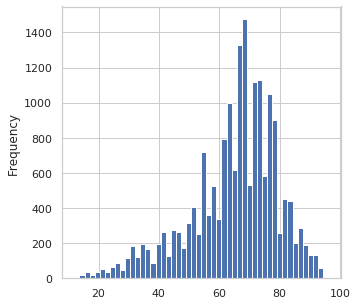

In [0]:
sliced.SprintSpeed.plot(kind = 'hist',bins = 50,figsize = (5,5))
plt.show()

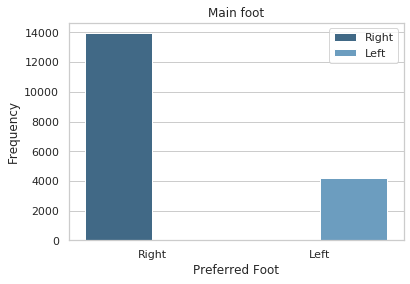

In [0]:
#Bar plot
sns.set(style='whitegrid')
ax=sns.barplot(x=data['Preferred Foot'].value_counts().index,y=data['Preferred Foot'].value_counts().values,palette="Blues_d",hue=['Right','Left'])
plt.xlabel('Preferred Foot')
plt.ylabel('Frequency')
plt.title('Main foot')
plt.show()

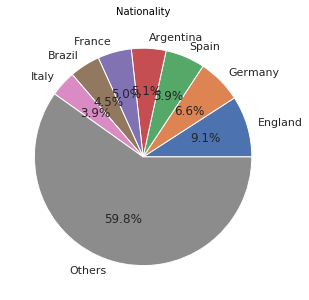

In [0]:
labels=list(data['Nationality'].value_counts().index[:7])
values=data['Nationality'].value_counts().values[:7].tolist()
labels.append('Others')
values.extend([(sum(data['Nationality'].value_counts().values[7:]))])

#visualization
plt.figure(figsize=(5,5))
plt.pie(values,labels=labels,autopct='%1.1f%%')
plt.title('Nationality',color='black',fontsize=10)
plt.show()

let's visualize the outliers

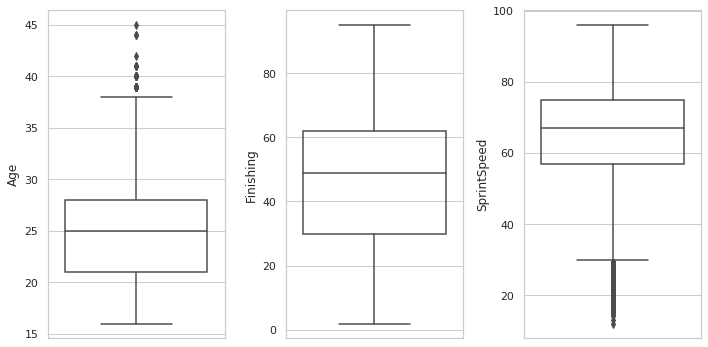

In [0]:
columns = sliced.select_dtypes(include=np.number).columns
figure = plt.figure(figsize=(10, 5))
figure.add_subplot(1, len(columns), 1)
for index, col in enumerate(columns):
    if index > 0:
        figure.add_subplot(1, len(columns), index + 1)
    sns.boxplot(y=col, data=sliced, boxprops={'facecolor': 'None'})
figure.tight_layout()
plt.show()

Till now all the analysis is for single feature. What if there is a relationshiop between any two feature. 

# Do you believe that all younger player run faster than all of those older player ? 
But what our data says

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


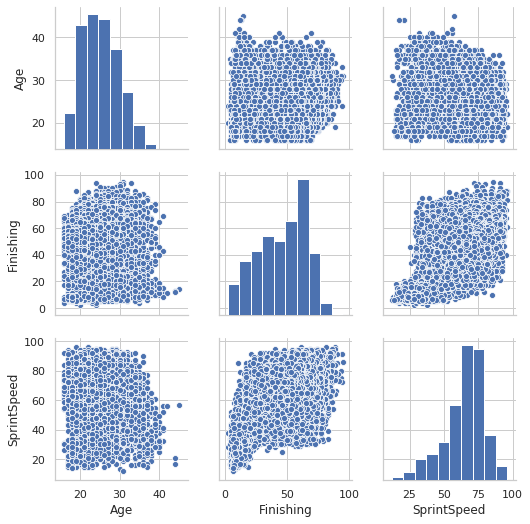

In [0]:
sns.pairplot(sliced.select_dtypes(include=np.number))
plt.show()

Lets see the same thing , but add one more paramter : preferred foot. 

PREVIOUSLY you have seen how fast young and old player are ?
NOW, 
### how fast young left footed , young right footed , old right footed , old left footed  ?

Here, we are observing relationship between three parameter. 

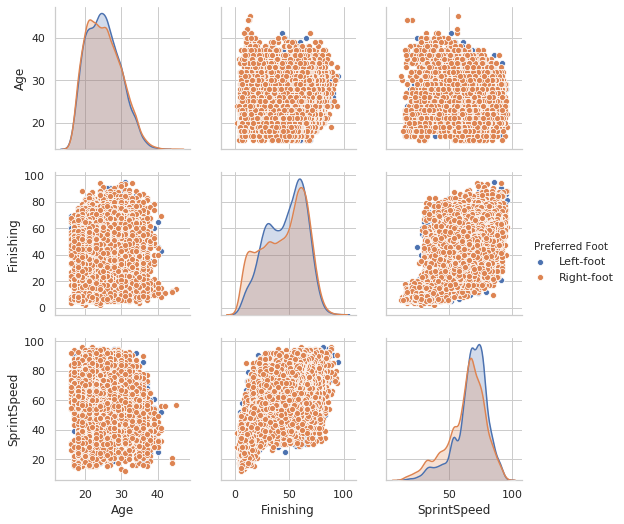

In [0]:
sns.pairplot(sliced.select_dtypes(include=np.number).join(sliced[["Preferred Foot"]]), hue="Preferred Foot")
plt.show()

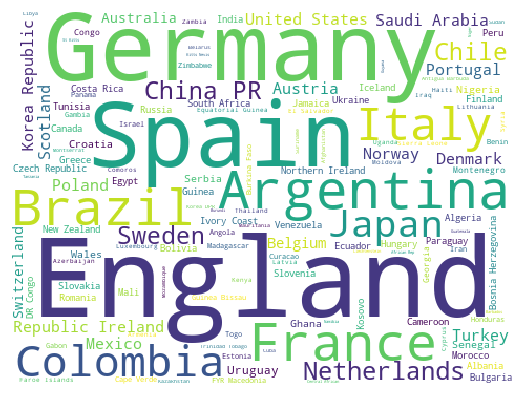

In [0]:
from wordcloud import WordCloud
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
plt.subplots(figsize=(15,5))
wordcloud = WordCloud(
                          background_color='white',
                          width=480,
                          height=360
                         ).generate(" ".join(sliced.Nationality))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Memory Management Tip
How could you work with 500mb dataset ? Do you know How much memory your dataframe is consuming ? 

This is critical to know , and memory efficient code is ♥️️

In [0]:
sliced.memory_usage(deep=True)

Index                 128
Name              1298330
Age                145656
Nationality       1287034
Club              1352403
Value             1666696
Finishing          145656
SprintSpeed        145656
Preferred Foot    1213978
dtype: int64

In [0]:
sliced = sliced.astype({
    'Preferred Foot':'category',
    'Age':'int8'
    })

In [0]:
sliced.memory_usage(deep=True)

Index                 128
Name              1298330
Age                 18207
Nationality       1287034
Club              1352403
Value             1666696
Finishing          145656
SprintSpeed        145656
Preferred Foot      18420
dtype: int64

# Scrapping data using Pandas

In [0]:
url = "https://en.wikipedia.org/wiki/Twitter"
tables = pd.read_html(url)
len(tables)

15

In [0]:
tables

[                                                    0                                                  1
 0                                                 NaN                                                NaN
 1   Screenshot The default page shown to logged-ou...  Screenshot The default page shown to logged-ou...
 2                                    Type of business                                             Public
 3                                        Type of site                    News, social networking service
 4                                        Available in                                       Multilingual
 5                                           Traded as                        NYSE: TWTRS&P 500 Component
 6                                             Founded                       March 21, 2006; 13 years ago
 7                                        Headquarters           San Francisco, California, United States
 8                                         Coo

In [0]:
matching_tables =pd.read_html(url, match="Followers")
len(matching_tables)

1

In [0]:
matching_tables[0]

,Rank,Change (monthly),Account name,Owner,Followers (millions),Activity,Country
0,1.0,NaN,@BarackObama,Barack Obama,110.4,Former U.S. President,USA
1,2.0,NaN,@katyperry,Katy Perry,108.2,Musician,USA
2,3.0,NaN,@justinbieber,Justin Bieber,107.2,Musician,CAN
3,4.0,NaN,@rihanna,Rihanna,94.5,Musician,BAR
4,5.0,NaN,@taylorswift13,Taylor Swift,85.1,Musician,USA
5,6.0,NaN,@Cristiano,Cristiano Ronaldo,81.1,Footballer,POR
6,7.0,NaN,@ladygaga,Lady Gaga,80.3,Musician and actress,USA
7,8.0,NaN,@TheEllenShow,Ellen DeGeneres,79.0,Comedian,USA
8,9.0,NaN,@YouTube,YouTube,72.0,Online video platform,USA
9,10.0,NaN,@ArianaGrande,Ariana Grande,67.5,Musician and actress,USA


looks Great, if we need more advance Scrapping library BeautifulSoup. 

# PDF
what about working with pdf ? 

In [0]:
!pip install tabula-py

The good perks about google collab is you could install / download libraries/ files as you do in your local machine.

In [0]:
!wget https://www.w3.org/WAI/WCAG20/Techniques/working-examples/PDF20/table.pdf

--2019-12-15 15:20:21--  https://www.w3.org/WAI/WCAG20/Techniques/working-examples/PDF20/table.pdf
Resolving www.w3.org (www.w3.org)... 128.30.52.100
Connecting to www.w3.org (www.w3.org)|128.30.52.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66887 (65K) [application/pdf]
Saving to: ‘table.pdf.2’

table.pdf.2         100%[===================>]  65.32K  --.-KB/s    in 0.05s   

2019-12-15 15:20:21 (1.36 MB/s) - ‘table.pdf.2’ saved [66887/66887]



In [0]:
!ls # command line to see files in the current directory

data.csv  sample_data  table.pdf  table.pdf.1  table.pdf.2


In [0]:
from tabula import read_pdf
df = read_pdf("table.pdf")

In [0]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Results
0,NaN,NaN,NaN,Ballots,NaN,NaN
1,Disability,NaN,Ballots,NaN,NaN,NaN
2,NaN,Participants,NaN,Incomplete/,NaN,NaN
3,Category,NaN,Completed,NaN,Accuracy,Time to
4,NaN,NaN,NaN,Terminated,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,complete
6,Blind,5,1,4,"34.5%, n=1","1199 sec, n=1"
7,Low Vision,5,2,3,98.3% n=2,"1716 sec, n=3"
8,NaN,NaN,NaN,NaN,"(97.7%, n=3)","(1934 sec, n=2)"
9,Dexterity,5,4,1,"98.3%, n=4","1672.1 sec, n=4"


The dataframe shows NaN, it could not render the pdf properly. Either one can reformat the pdf or use more advance OCR to pdf rendering.